## Datenaufbereitung

### Author: Sangeeths Chandrakumar

### Importieren der benötigten Bibliotheken

In [85]:
# Import necessary libraries and load the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

### Laden der Daten

In [86]:
heart_data = pd.read_csv('heart.csv')
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Eiblick in die Daten

In [87]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Fehlende Werte

In [88]:
# Check for missing values
missing_values = heart_data.isnull().sum()
missing_values[missing_values > 0]  # Zeigt nur Spalten mit fehlenden Werten an

Series([], dtype: int64)

Der Datensatz enthält keine fehlenden Werte, daher ist keine Auffüllung notwendig.

In [89]:


# Trennen der Features und des Ziels
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Aufteilen der Daten in Trainings- und Testdatensätze (80% Training, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ergebnis des Splits überprüfen
train_test_split_result = {
    'X_train_shape': X_train.shape,
    'X_test_shape': X_test.shape,
    'y_train_shape': y_train.shape,
    'y_test_shape': y_test.shape
}

train_test_split_result

{'X_train_shape': (820, 13),
 'X_test_shape': (205, 13),
 'y_train_shape': (820,),
 'y_test_shape': (205,)}

### Umwandlung kategorischer Werte in numerische Werte


Einige der Spalten im Datensatz sind kategorische Variablen (cp, restecg, slope, thal). Diese müssen in numerische Werte umgewandelt werden, um sie in maschinellen Lernmodellen verwenden zu können, da die meisten Algorithmen mit numerischen Daten arbeiten. Wir können Techniken wie One-Hot-Encoding oder Label-Encoding verwenden, abhängig von der Natur der Daten:

One-Hot-Encoding wird verwendet, wenn die kategorischen Werte keine ordinale Beziehung haben. Dabei wird jede Kategorie als eine separate binäre Spalte dargestellt.
Label-Encoding kann verwendet werden, wenn die Kategorien eine ordinale Beziehung haben (z.B. niedrig, mittel, hoch).

Lassen Sie uns die Verteilung dieser kategorischen Variablen überprüfen und entscheiden, welche Technik angewendet werden sollte.​

In [90]:
# Überprüfung der einzigartigen Werte in den kategorischen Spalten
categorical_columns = ['cp', 'restecg', 'slope', 'thal']
unique_values = {col: X_train[col].unique() for col in categorical_columns}
unique_values

{'cp': array([2, 0, 1, 3], dtype=int64),
 'restecg': array([0, 1, 2], dtype=int64),
 'slope': array([2, 1, 0], dtype=int64),
 'thal': array([2, 3, 1, 0], dtype=int64)}

Da keine dieser Variablen eine klare ordinale Beziehung aufweist (zum Beispiel niedrig, mittel, hoch), ist es am besten, One-Hot-Encoding anzuwenden. Dies verhindert, dass das Modell irrtümlich eine Ordnung oder Distanz zwischen den Kategorien annimmt, die nicht existiert.

Ich werde nun One-Hot-Encoding für diese Variablen anwenden.​

In [91]:
# Anwenden von One-Hot-Encoding auf kategorische Spalten
X_train_encoded  = pd.get_dummies(X_train, columns=categorical_columns)
X_train_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
835,49,1,118,149,0,126,0,0.8,3,0,...,1,0,0,0,0,1,0,0,1,0
137,64,0,180,325,0,154,1,0.0,0,1,...,0,1,0,0,0,1,0,0,1,0
534,54,0,108,267,0,167,0,0.0,0,0,...,1,0,0,0,0,1,0,0,1,0
495,59,1,135,234,0,161,0,0.5,0,1,...,0,1,0,0,1,0,0,0,0,1
244,51,1,125,245,1,166,0,2.4,0,0,...,1,0,0,0,1,0,0,0,1,0


In [92]:
X_test_encoded = pd.get_dummies(X_test, columns=categorical_columns)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)
X_test_encoded.head()


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_0,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
527,62,0,124,209,0,163,0,0.0,0,1,...,0,1,0,0,0,1,0,0,1,0
359,53,0,128,216,0,115,0,0.0,0,0,...,1,0,0,0,0,1,1,0,0,0
447,55,1,160,289,0,145,1,0.8,1,1,...,1,0,0,0,1,0,0,0,0,1
31,50,0,120,244,0,162,0,1.1,0,0,...,0,1,0,0,0,1,0,0,1,0
621,48,1,130,256,1,150,1,0.0,2,1,...,1,0,0,0,0,1,0,0,0,1


In [93]:
X_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 835 to 860
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        820 non-null    int64  
 1   sex        820 non-null    int64  
 2   trestbps   820 non-null    int64  
 3   chol       820 non-null    int64  
 4   fbs        820 non-null    int64  
 5   thalach    820 non-null    int64  
 6   exang      820 non-null    int64  
 7   oldpeak    820 non-null    float64
 8   ca         820 non-null    int64  
 9   cp_0       820 non-null    uint8  
 10  cp_1       820 non-null    uint8  
 11  cp_2       820 non-null    uint8  
 12  cp_3       820 non-null    uint8  
 13  restecg_0  820 non-null    uint8  
 14  restecg_1  820 non-null    uint8  
 15  restecg_2  820 non-null    uint8  
 16  slope_0    820 non-null    uint8  
 17  slope_1    820 non-null    uint8  
 18  slope_2    820 non-null    uint8  
 19  thal_0     820 non-null    uint8  
 20  thal_1  

In [94]:
X_test_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 527 to 842
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        205 non-null    int64  
 1   sex        205 non-null    int64  
 2   trestbps   205 non-null    int64  
 3   chol       205 non-null    int64  
 4   fbs        205 non-null    int64  
 5   thalach    205 non-null    int64  
 6   exang      205 non-null    int64  
 7   oldpeak    205 non-null    float64
 8   ca         205 non-null    int64  
 9   cp_0       205 non-null    uint8  
 10  cp_1       205 non-null    uint8  
 11  cp_2       205 non-null    uint8  
 12  cp_3       205 non-null    uint8  
 13  restecg_0  205 non-null    uint8  
 14  restecg_1  205 non-null    uint8  
 15  restecg_2  205 non-null    uint8  
 16  slope_0    205 non-null    uint8  
 17  slope_1    205 non-null    uint8  
 18  slope_2    205 non-null    uint8  
 19  thal_0     205 non-null    uint8  
 20  thal_1  

### Anpassung numerischer Werte

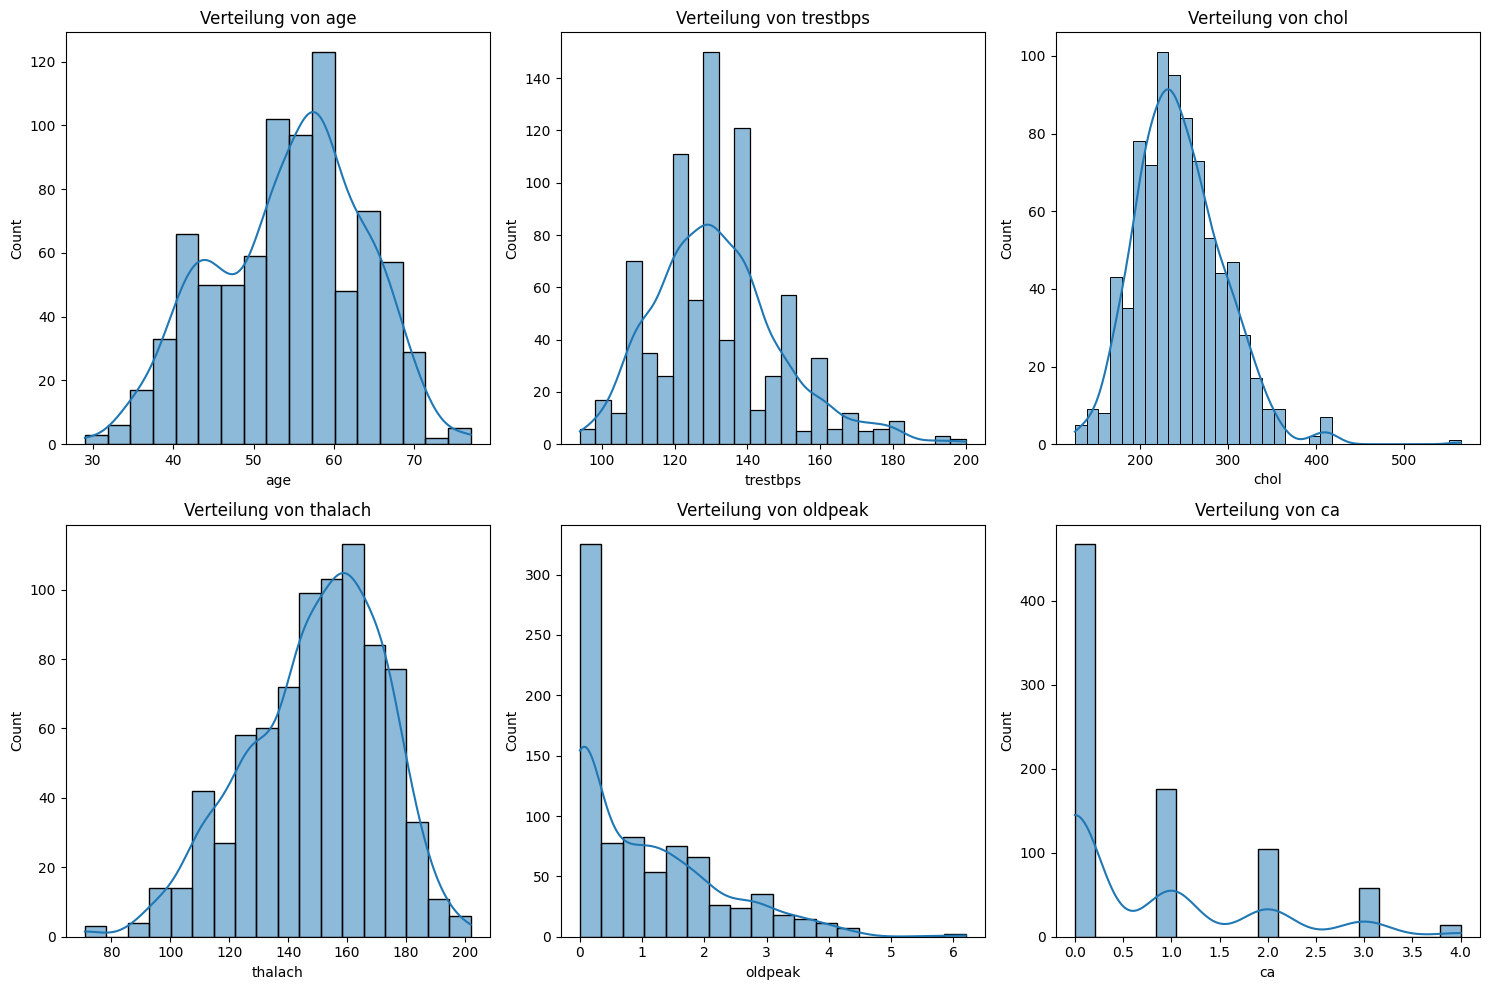

,age,trestbps,chol,thalach,oldpeak,ca
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,54.367073,131.724390,245.051220,149.351220,1.040244,0.751220
std,9.166917,17.618454,49.668373,22.927684,1.141124,1.036129
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,132.000000,0.000000,0.000000
50%,56.000000,130.000000,240.000000,152.000000,0.800000,0.000000
75%,61.000000,140.000000,274.000000,166.250000,1.650000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


In [95]:
# Statistische Zusammenfassung der numerischen Variablen
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']
heart_data_numerical_summary = X_train[numerical_columns].describe()

# Erstellung von Histogrammen für die numerischen Variablen
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(X_train[col], kde=True)
    plt.title(f'Verteilung von {col}')
plt.tight_layout()
plt.show()

heart_data_numerical_summary


## Skalierung der Daten

Eine Möglichkeit, mit diesen Ausreißern und Schiefheiten umzugehen, ist die Anwendung einer Logarithmus- oder Wurzeltransformation. Solche Transformationen können helfen, die Datenverteilungen symmetrischer zu gestalten und die Auswirkungen von Ausreißern zu mindern. Allerdings ist es wichtig, dass keine negativen oder Nullwerte in den Daten vorhanden sind, bevor solche Transformationen angewendet werden.

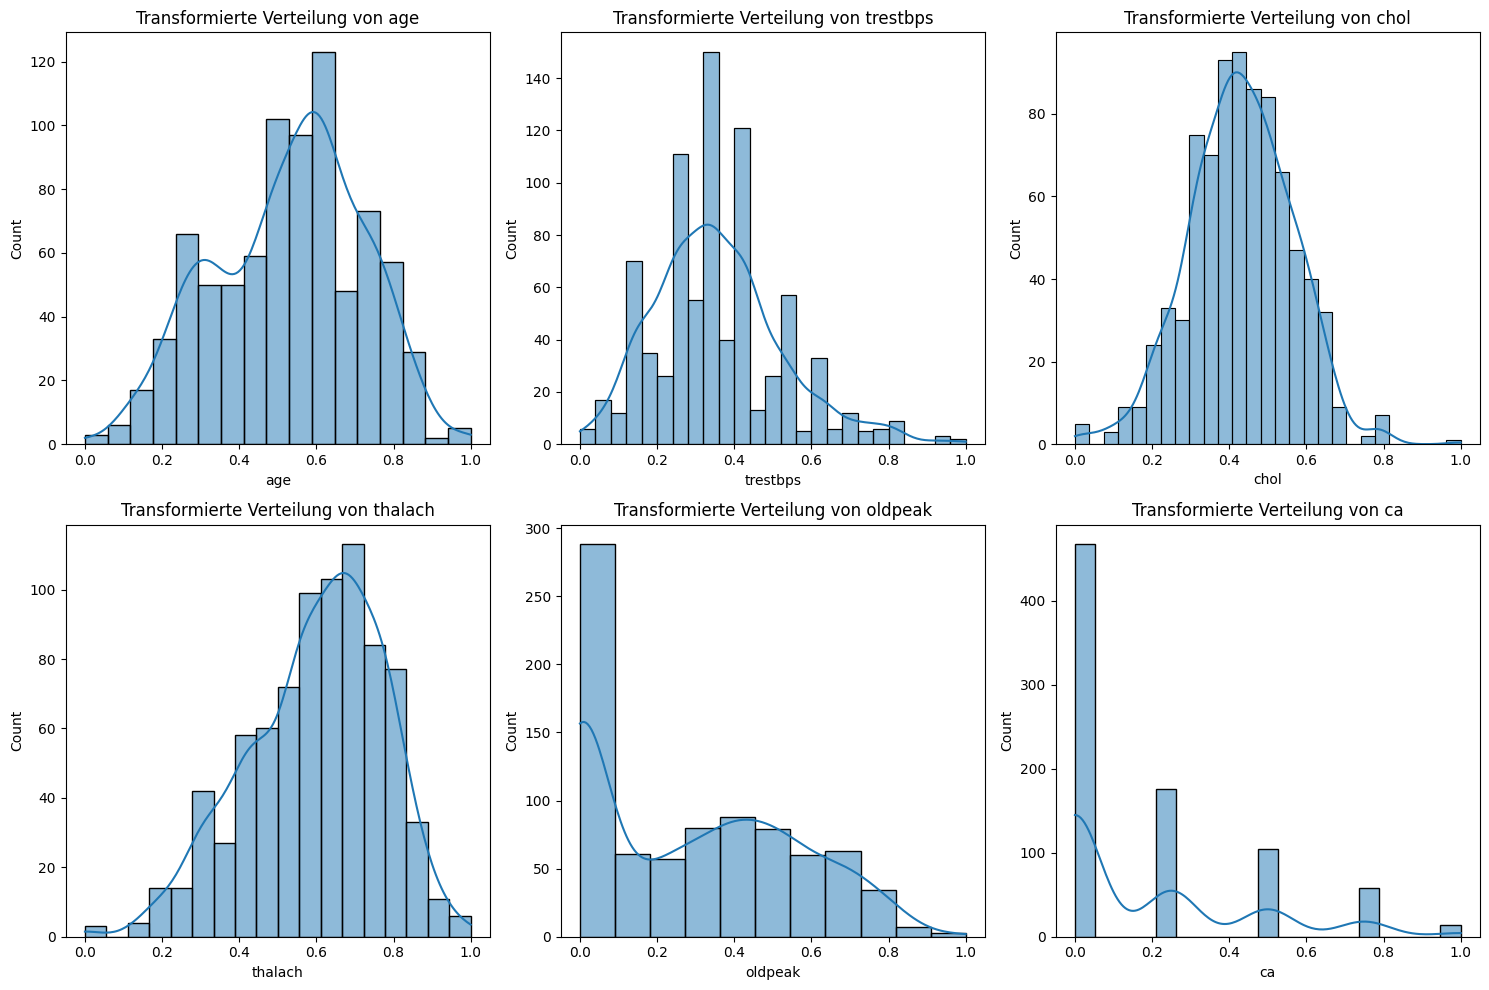

,age,trestbps,chol,thalach,oldpeak,ca
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.528481,0.355890,0.429762,0.598101,0.289658,0.187805
std,0.190977,0.166212,0.133761,0.175020,0.264847,0.259032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.245283,0.343284,0.465649,0.000000,0.000000
50%,0.562500,0.339623,0.429179,0.618321,0.297752,0.000000
75%,0.666667,0.433962,0.517596,0.727099,0.493414,0.250000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:


# Logarithmische Transformation für 'chol' und 'oldpeak'
heart_data_transformed = X_train.copy()
heart_data_transformed['chol'] = np.log1p(heart_data_transformed['chol'])
heart_data_transformed['oldpeak'] = np.log1p(heart_data_transformed['oldpeak'])

# Standardisierung der numerischen Variablen
scaler = MinMaxScaler()
heart_data_transformed[numerical_columns] = scaler.fit_transform(heart_data_transformed[numerical_columns])

transformed_numerical_summary = heart_data_transformed[numerical_columns].describe()

# Erstellung von Histogrammen für die transformierten numerischen Variablen
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.histplot(heart_data_transformed[col], kde=True)
    plt.title(f'Transformierte Verteilung von {col}')
plt.tight_layout()
plt.show()

transformed_numerical_summary


Die Transformation und Standardisierung der numerischen Variablen wurden erfolgreich durchgeführt. Die Histogramme zeigen jetzt, dass die Verteilungen symmetrischer sind und die Ausreißer weniger Einfluss haben.

In [97]:
#übertragung der Transformation auf die Trainingsdaten
X_train = heart_data_transformed.copy()
X_train.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,0.416667,1,2,0.226415,0.111513,0,0,0.419847,0,0.297752,2,0.75,2
137,0.729167,0,0,0.811321,0.631573,0,1,0.633588,1,0.000000,2,0.00,2
534,0.520833,0,2,0.132075,0.500322,0,0,0.732824,0,0.000000,2,0.00,2
495,0.625000,1,0,0.386792,0.412289,0,1,0.687023,0,0.205394,1,0.00,3
244,0.458333,1,2,0.292453,0.442937,1,0,0.725191,0,0.619922,1,0.00,2


In [98]:
# Übertragung der Transformation auf die Testdaten
X_test_transformed = X_test.copy()
X_test_transformed['chol'] = np.log1p(X_test_transformed['chol'])
X_test_transformed['oldpeak'] = np.log1p(X_test_transformed['oldpeak'])
X_test_transformed[numerical_columns] = scaler.transform(X_test_transformed[numerical_columns])
X_test = X_test_transformed.copy()
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
527,0.687500,0,0,0.283019,0.336934,0,1,0.702290,0,0.000000,2,0.00,2
359,0.500000,0,2,0.320755,0.358902,0,0,0.335878,0,0.000000,2,0.00,0
447,0.541667,1,0,0.622642,0.553177,0,0,0.564885,1,0.297752,1,0.25,3
31,0.437500,0,1,0.245283,0.440208,0,1,0.694656,0,0.375839,2,0.00,2
621,0.395833,1,0,0.339623,0.472244,1,0,0.603053,1,0.000000,2,0.50,3


In [99]:
print("Die Dimensionen des Urpsrungsdatensatzes : {}".format(X_train.shape))
print("Die Dimensionen des umgeformten Datensatzes : {}".format(X_test.shape))

Die Dimensionen des Urpsrungsdatensatzes : (820, 13)
Die Dimensionen des umgeformten Datensatzes : (205, 13)


### Speichern der Daten

In [100]:
X_train.to_csv("Xtrain_heart_data.csv",index=False)
X_test.to_csv("Xtest_heart_data.csv",index=False)
y_train.to_csv("ytrain_heart_data.csv",index=False)
y_test.to_csv("ytest_heart_data.csv",index=False)